**Alunos**
- Igor Santiago Almeida Paixão (1914033)
- Marcus Vinicius Souza Fernandes (1914046)

In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import set_option
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import warnings
from sklearn import cluster, metrics

warnings.filterwarnings('ignore')

Lendo os datasets

In [2]:
train = pd.read_csv("train.csv", delimiter=",", index_col=0)
df_train = train.copy()

In [3]:
df_train.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [4]:
# Lendo a base de teste
test = pd.read_csv("test.csv", delimiter=",")
df_test = test.copy()

In [5]:
df_test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [6]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Descriptive analysis

#### Dimensions of Data

In [7]:
print(f"dimensions of dataset train: \nlins = {df_train.shape[0]} \ncols = {df_train.shape[1]}\n\n")
print(f"dimensions of dataset test: \nlins = {df_test.shape[0]} \ncols = {df_test.shape[1]}")

dimensions of dataset train: 
lins = 891 
cols = 11


dimensions of dataset test: 
lins = 418 
cols = 11


Tipos de atributos

#### Data Type for Each Attribute

In [8]:
atributte_types_train = df_train.dtypes
atributte_types_train

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [9]:
atributte_types_test = df_test.dtypes
atributte_types_test

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### Column Semantics

De acordo com o tipo de cada atributo e a análise semântica feita, vamos separar os tipos de atributos conforme recomendado.

Mas antes vamos explicar qual o significado de cada atributo dos datasets:
- **PassengerId** : Id do passageiro no titanic.
- **Survived** : 1 caso sobreviviu, senão 0.
- **Pclass** : Classe do bilhete, 1 = 1º, 2 = 2º, 3 = 3º.
- **Name** : Nome do passageiro.
- **Sex** : Sexo do passageiro.
- **Age** : Idade do passageiro.
    - A idade é fracionada se menor que 1. Se a idade é estimada, é na forma de xx.5
- **SibSp** : # Irmãos/Cônjuges a bordo do Titanic.
    - Irmão = irmão, irmã, meio-irmão, meia-irmã
    - Cônjuge = marido, esposa (amantes e noivos foram ignorados)
- **Parch** : # de Pais/Filhos a bordo do Titanic.
    - Pai = mãe, pai
    - Filho = filha, filho, enteada, enteado.
    - Algumas crianças viajavam apenas com uma babá, portanto, Parch=0 para elas.
- **Ticket** : Número do Ticket.
- **Fare** : Tarifa do Passageiro.
- **Cabin** : Numero da cabine.
- **Embarked** : Ponto de Embarque. C = Cherbourg, Q = Queenstown, S = Southampton.

#### Continuous Attributes

In [10]:
# PassengerId: Chave primária
# Os atributos contínuos são aqueles que podem assumir um valor em um intervalo contínuo.

continuous_attributes = df_train[["Age", "Fare"]]
continuous_attributes

,Age,Fare
PassengerId,,
1,22.0,7.2500
2,38.0,71.2833
3,26.0,7.9250
4,35.0,53.1000
5,35.0,8.0500
...,...,...
887,27.0,13.0000
888,19.0,30.0000
889,NaN,23.4500


#### Discrete Attributes

In [11]:
# PassengerId: Chave primária
# Os atributos discretos são aqueles que podem assumir apenas valores específicos, geralmente inteiros.

discrete_attributes = df_train[["SibSp", "Parch"]]
discrete_attributes

,SibSp,Parch
PassengerId,,
1,1,0
2,1,0
3,0,0
4,1,0
5,0,0
...,...,...
887,0,0
888,0,0
889,1,2


#### Binary Attributes

In [12]:
# PassengerId: Chave primária
# Os atributos binários são aqueles que possuem apenas duas categorias distintas, como "sim" e "não", "verdadeiro" e "falso".

binary_attributes = df_train[["Survived", "Sex"]]
binary_attributes

,Survived,Sex
PassengerId,,
1,0,male
2,1,female
3,1,female
4,1,female
5,0,male
...,...,...
887,0,male
888,1,female
889,0,female


#### Nominal Categorical Attributes

In [13]:
# PassengerId: Chave primária

# Atributos Categóricos Nominais: Os atributos categóricos nominais são aqueles que possuem categorias sem uma ordem específica.

nominal_categorical_attributes = df_train[["Pclass", "Cabin", "Embarked"]]
nominal_categorical_attributes

,Pclass,Cabin,Embarked
PassengerId,,,
1,3,NaN,S
2,1,C85,C
3,3,NaN,S
4,1,C123,S
5,3,NaN,S
...,...,...,...
887,2,NaN,S
888,1,B42,S
889,3,NaN,S


Agora que temos os atributos separados por tipo, conseguimos ter uma visão mais clara de quais atributos vão ser mais úteis para nosso algoritmo, quais os tipos, agora vamos verificar uma visão estatistica geral do atríbutos numéricos.

In [14]:
df_numerics_values = df_train.select_dtypes(include=['int64', 'float64'])

In [15]:
set_option('display.width', 100)
set_option('display.precision', 2)
df_numerics_values.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,714.00,891.00,891.00,891.00
mean,0.38,2.31,29.70,0.52,0.38,32.20
std,0.49,0.84,14.53,1.10,0.81,49.69
min,0.00,1.00,0.42,0.00,0.00,0.00
25%,0.00,2.00,20.12,0.00,0.00,7.91
50%,0.00,3.00,28.00,0.00,0.00,14.45
75%,1.00,3.00,38.00,1.00,0.00,31.00
max,1.00,3.00,80.00,8.00,6.00,512.33


Podemos notar que temos alguns valores de idades nulos/vazios, pois temos 891 passageiros e 714 idades registradas.

Também podemos notar que até o 3 percentil pelo menos 75% dos valores da tarifa paga pelo passageiro é menor que 31,00 isso mostra que temos uma descrepância de valor bem alta no valor máximo.

Podemos concluir que a média de idade das pessoas a bordo era de 30 anos, poderia ser um indício que a grande maioria já possuia um filho, já que temos 75% das pessoas com 20 anos ou mais.

#### Visualizing numeric and binary columns and their distributions

Primeiramente vamos analisar uma vizualização gráfica dos atributos que são númericos, porém são binários e/ou discretos.

   Survived
0     61.62
1     38.38
   Pclass
3   55.11
1   24.24
2   20.65


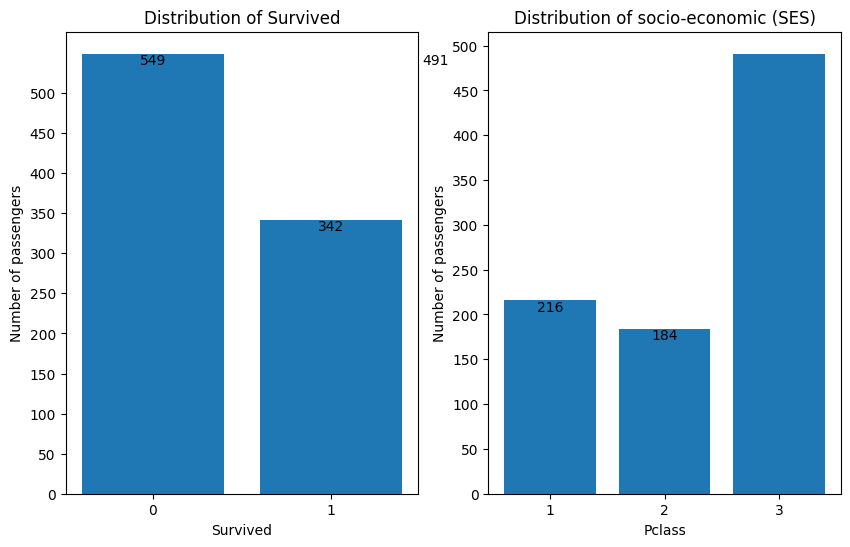

In [16]:
f, ax = plt.subplots(1, 2, figsize=(10, 6))

print((df_numerics_values['Survived'].value_counts().to_frame() / df_numerics_values.shape[0]) * 100)

counts_survived = df_numerics_values['Survived'].value_counts()
ax[0].bar(counts_survived.index, counts_survived.values)
ax[0].set_xticks(counts_survived.index)

for i in range(len(counts_survived.index)):
    ax[0].text(i, counts_survived.values[i], counts_survived.values[i], ha = 'center', va='top')

y_ticks = np.arange(0, 550, 50)
ax[0].set_yticks(y_ticks)
ax[0].set_xlabel("Survived")
ax[0].set_ylabel("Number of passengers")
ax[0].set_title("Distribution of Survived")

print((df_numerics_values['Pclass'].value_counts().to_frame() / df_numerics_values.shape[0]) * 100)
counts_pclass = df_numerics_values['Pclass'].value_counts()
ax[1].bar(counts_pclass.index, counts_pclass.values)
ax[1].set_xticks(counts_pclass.index)

for i in range(len(counts_pclass.index)):
    ax[1].text(i, counts_pclass.values[i], counts_pclass.values[i], ha = 'center', va='top')

y_ticks = np.arange(0, 550, 50)
ax[1].set_yticks(y_ticks)
ax[1].set_xlabel("Pclass")
ax[1].set_ylabel("Number of passengers")
ax[1].set_title("Distribution of socio-economic (SES)")

plt.show()

Podemos observar que o número de passageiros sobreviventes se aproxima bastante da quantidade de passageiros presentes na classe economica 1 e 2. Isso pode ser um indicativo bastante útil.

Abaixo podemos ter uma visão gráfica e númerica da distribuição de probabilidade dos valores das colunas que são numéricas e/ou continuas. Importante também salientar que nem todos os tipos de atributos serão melhores vizualizados com um mesmo tipo gráfico, talvez pode gerar uma confusão dependendo do tipo dado da coluna e a sua semântica.

In [17]:
print((df_numerics_values["SibSp"].value_counts().to_frame() / df_numerics_values["SibSp"].shape[0]) * 100)

   SibSp
0  68.24
1  23.46
2   3.14
4   2.02
3   1.80
8   0.79
5   0.56


In [18]:
print((df_numerics_values["Parch"].value_counts().to_frame() / df_numerics_values["SibSp"].shape[0]) * 100)

   Parch
0  76.09
1  13.24
2   8.98
5   0.56
3   0.56
4   0.45
6   0.11


In [19]:
print(df_numerics_values["Age"].value_counts().to_frame())

       Age
24.00   30
22.00   27
18.00   26
19.00   25
28.00   25
...    ...
36.50    1
55.50    1
0.92     1
23.50    1
74.00    1

[88 rows x 1 columns]


Text(0.5, 1.0, 'Distribution of Age')

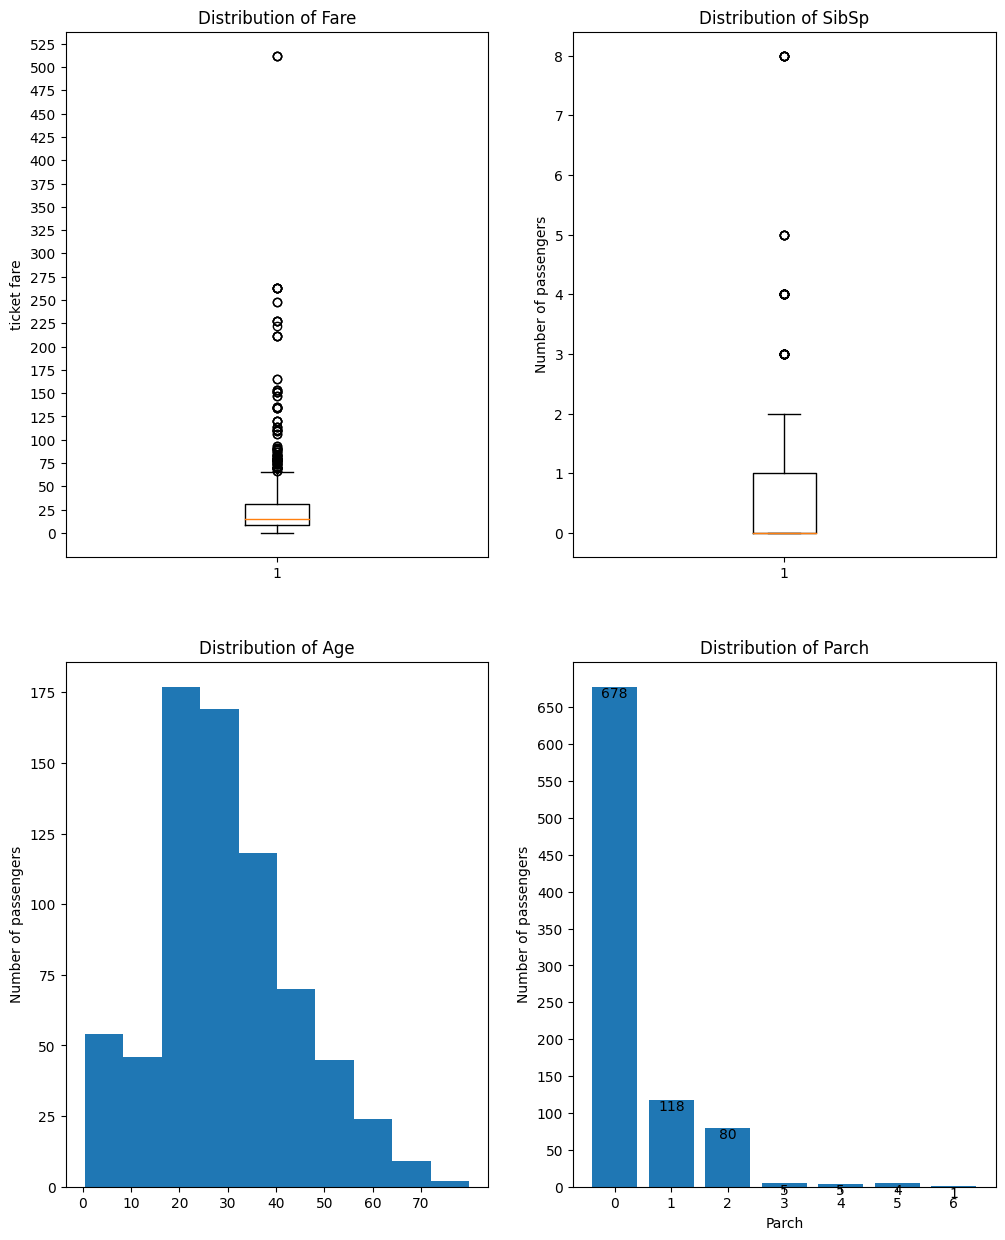

In [20]:
# indexs = ['Age', 'SibSp', 'Parch', 'Fare']

f, ax2 = plt.subplots(2, 2, figsize=(12, 15))

ax2[0, 0].boxplot(df_numerics_values["Fare"])
y_ticks_fare = np.arange(0, 550, 25)
ax2[0, 0].set_yticks(y_ticks_fare)
ax2[0, 0].set_ylabel("ticket fare")
ax2[0, 0].set_title("Distribution of Fare")


ax2[0, 1].boxplot(df_numerics_values["SibSp"])
ax2[0, 1].set_title("SibSp")
ax2[0, 1].set_title("SibSp")
y_ticks_sib = np.arange(0, 9, 1)
ax2[0, 1].set_yticks(y_ticks_sib)
ax2[0, 1].set_ylabel("Number of passengers")
ax2[0, 1].set_title("Distribution of SibSp")

counts_parch = df_numerics_values["Parch"].value_counts()
ax2[1, 1].bar(counts_parch.index, counts_parch.values)
ax2[1, 1].set_xticks(counts_parch.index)

for i in range(len(counts_parch.index)):
    ax2[1, 1].text(i, counts_parch.values[i], counts_parch.values[i], ha = 'center', va='top')

y_ticks_parch = np.arange(0, 700, 50)
ax2[1, 1].set_yticks(y_ticks_parch)
ax2[1, 1].set_xlabel("Parch")
ax2[1, 1].set_ylabel("Number of passengers")
ax2[1, 1].set_title("Distribution of Parch")

ax2[1, 0].hist(df_numerics_values['Age'].values)
ax2[1, 0].set_title("Age")
y_ticks_age = np.arange(0, 200, 25)
ax2[1, 0].set_yticks(y_ticks_age)
x_ticks_age = np.arange(0, 80, 10)
ax2[1, 0].set_xticks(x_ticks_age)
ax2[1, 0].set_ylabel("Number of passengers")
ax2[1, 0].set_title("Distribution of Age")

#### Correlations Between Attributes Using Method For Calculating Correlation is Pearson’s Correlation Coefficient.

A matriz lista todos os atributos na parte superior e inferior do lado, para dar correlação entre todos os pares de atributos (duas vezes, porque a matriz é simétrica). Você pode ver a linha diagonal através da matriz dos cantos superior esquerdo para inferior direito da matriz mostra a correlação perfeita de cada atributo consigo mesmo.

In [21]:
set_option('display.width', 100)
set_option('display.precision', 2)
correlations = df_numerics_values.corr(method='pearson')
correlations

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.00,-0.34,-0.08,-0.04,0.08,0.26
Pclass,-0.34,1.00,-0.37,0.08,0.02,-0.55
Age,-0.08,-0.37,1.00,-0.31,-0.19,0.10
SibSp,-0.04,0.08,-0.31,1.00,0.41,0.16
Parch,0.08,0.02,-0.19,0.41,1.00,0.22
Fare,0.26,-0.55,0.10,0.16,0.22,1.00


Vizualizando no geral de primeiro momento temos a correlação entre alguns atributos mais positivos e outros mais negativos, podemos afirmar o obvio olhando para correlação do atributo Fare e Pclass por exemplo, que possuem uma correlação negativa de -0.55 que diz que quanto mais o fare, menor será o Pclass. Assim também como podemos a relação das colunas SibSP e Parch que reforça que quando uma pessoa tinha mais conjuges ou irmãos era mais suscetível a ter mais parentes no navio.

#### Removing null values

In [22]:
df_train.loc[(df_train["Pclass"] == 1) & (df_train["Fare"] >= 70.0), "Fare"] = df_train[df_train["Pclass"] == 1]["Fare"].mean()
df_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,714.00,891.00,891.00,891.00
mean,0.38,2.31,29.70,0.52,0.38,26.21
std,0.49,0.84,14.53,1.10,0.81,25.18
min,0.00,1.00,0.42,0.00,0.00,0.00
25%,0.00,2.00,20.12,0.00,0.00,7.91
50%,0.00,3.00,28.00,0.00,0.00,14.45
75%,1.00,3.00,38.00,1.00,0.00,31.00
max,1.00,3.00,80.00,8.00,6.00,84.15


Como vimos que as pessoas mais velhas estão na primeira classe então decidimos assumir a media da idade da classe como substituição para valores de idade nulo.

In [23]:
for i in range(1, 4):
    df_train.loc[(df_train["Pclass"] == i) & (df_train["Age"].isnull()), "Age"] = df_train[df_train["Pclass"] == i]["Age"].mean()

In [24]:
df_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,84.15,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14,1,2,W./C. 6607,23.45,NaN,S


In [25]:
df_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,891.00,891.00,891.00
mean,0.38,2.31,29.29,0.52,0.38,26.21
std,0.49,0.84,13.21,1.10,0.81,25.18
min,0.00,1.00,0.42,0.00,0.00,0.00
25%,0.00,2.00,22.00,0.00,0.00,7.91
50%,0.00,3.00,26.00,0.00,0.00,14.45
75%,1.00,3.00,37.00,1.00,0.00,31.00
max,1.00,3.00,80.00,8.00,6.00,84.15


#### Softening the noises, with new columns

In [26]:
bins_age = [0, 10, 20, 40, 60, 80]
df_train["Age group"] = pd.cut(df_train["Age"], bins_age, labels=['0-10', '11-20', '21-40', '41-60', '61-80'], right=False)

In [27]:
bins_parch = [0, 1, 3, 6]
df_train["Parch group"] = pd.cut(df_train["Parch"], bins_parch, labels=['0', '1-2', '3-6'], right=False)

In [28]:
bins_sibsp = [0, 1, 2, 3, 8]
df_train["SibSp group"] = pd.cut(df_train["SibSp"], bins_sibsp, labels=['0', '1', '2', '3-8'], right=False)

In [29]:
for i in range(1, 4):
    print(df_train[df_train["Pclass"] == i]["Fare"].mean())
    print(i)

59.43149189814815
1
20.662183152173913
2
13.675550101832993
3


In [30]:
bins_fare = [0, 15, 30, 45, 60, 75, 90]
df_train["Fare group"] = pd.cut(df_train["Fare"], bins_fare, labels=['0-15', '16-30', '31-45', '46-60', '61-75', '76-90'], right=False)

In [31]:
dict_sex = {
    "female" : 0,
    "male" : 1
}

df_train["Sex"] = df_train["Sex"].map(dict_sex)

In [32]:
df_train.reset_index(drop=True, inplace=True)

In [33]:
df_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age group,Parch group,SibSp group,Fare group
0,0,3,"Braund, Mr. Owen Harris",1,22.00,1,0,A/5 21171,7.25,NaN,S,21-40,0,1,0-15
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.00,1,0,PC 17599,84.15,C85,C,21-40,0,1,76-90
2,1,3,"Heikkinen, Miss. Laina",0,26.00,0,0,STON/O2. 3101282,7.92,NaN,S,21-40,0,0,0-15
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.00,1,0,113803,53.10,C123,S,21-40,0,1,46-60
4,0,3,"Allen, Mr. William Henry",1,35.00,0,0,373450,8.05,NaN,S,21-40,0,0,0-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",1,27.00,0,0,211536,13.00,NaN,S,21-40,0,0,0-15
887,1,1,"Graham, Miss. Margaret Edith",0,19.00,0,0,112053,30.00,B42,S,11-20,0,0,31-45
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,25.14,1,2,W./C. 6607,23.45,NaN,S,21-40,1-2,1,16-30
889,1,1,"Behr, Mr. Karl Howell",1,26.00,0,0,111369,30.00,C148,C,21-40,0,0,31-45


In [34]:
# # Instanciar o OneHotEncoder
# columns_to_encode = ['Embarked']
# encoder = OneHotEncoder(sparse=False)
# # Ajustar e transformar os dados
# encoded_data = encoder.fit_transform(df_train[['Embarked']])
# df_encoded = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(columns_to_encode))
# df_encoded = df_encoded.add_suffix('_encoded')
# df_encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Embarked']))
# df_encoded.reset_index(drop=True, inplace=True)
# df_train = df_train.join(df_encoded)

In [35]:
# df_train = df_train.join(df_encoded)

In [36]:
# df_train["age_norm"] = df_train["Age"] / df_train["Age"].abs().max()
# df_train["fare_norm"] = df_train["Fare"] / df_train["Fare"].abs().max()
# df_train["parch_norm"] = df_train["Parch"] / df_train["Parch"].abs().max()
# df_train["sibsp_norm"] = df_train["SibSp"] / df_train["SibSp"].abs().max()

In [37]:
df_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age group,Parch group,SibSp group,Fare group
0,0,3,"Braund, Mr. Owen Harris",1,22.00,1,0,A/5 21171,7.25,NaN,S,21-40,0,1,0-15
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.00,1,0,PC 17599,84.15,C85,C,21-40,0,1,76-90
2,1,3,"Heikkinen, Miss. Laina",0,26.00,0,0,STON/O2. 3101282,7.92,NaN,S,21-40,0,0,0-15
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.00,1,0,113803,53.10,C123,S,21-40,0,1,46-60
4,0,3,"Allen, Mr. William Henry",1,35.00,0,0,373450,8.05,NaN,S,21-40,0,0,0-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",1,27.00,0,0,211536,13.00,NaN,S,21-40,0,0,0-15
887,1,1,"Graham, Miss. Margaret Edith",0,19.00,0,0,112053,30.00,B42,S,11-20,0,0,31-45
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,25.14,1,2,W./C. 6607,23.45,NaN,S,21-40,1-2,1,16-30
889,1,1,"Behr, Mr. Karl Howell",1,26.00,0,0,111369,30.00,C148,C,21-40,0,0,31-45


# Association Rules

In [38]:
from mlxtend.frequent_patterns import apriori, association_rules

In [39]:
df_train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin',
       'Embarked', 'Age group', 'Parch group', 'SibSp group', 'Fare group'],
      dtype='object')

In [40]:
df_aux = df_train[['Survived', 'Pclass', 'Sex', 'Embarked', 'Age group', 'Parch group', 'SibSp group', 'Fare group']]

df_aux_02 = df_train[['Survived', 'Pclass', 'Sex', 'Embarked', 'Age', 'SibSp', 'Parch', 'Fare']]

In [41]:
df_train_selected = df_aux.dropna()
# df_train_selected.reset_index(drop=True, inplace=True)

In [42]:
df_train_selected

,Survived,Pclass,Sex,Embarked,Age group,Parch group,SibSp group,Fare group
0,0,3,1,S,21-40,0,1,0-15
1,1,1,0,C,21-40,0,1,76-90
2,1,3,0,S,21-40,0,0,0-15
3,1,1,0,S,21-40,0,1,46-60
4,0,3,1,S,21-40,0,0,0-15
...,...,...,...,...,...,...,...,...
886,0,2,1,S,21-40,0,0,0-15
887,1,1,0,S,11-20,0,0,31-45
888,0,3,0,S,21-40,1-2,1,16-30
889,1,1,1,C,21-40,0,0,31-45


In [43]:
# Colunas a serem ajustadas e transformadas
columns_to_encode = ['Survived', 'Pclass', 'Sex', 'Embarked', 'Age group', 'Parch group', 'SibSp group', 'Fare group']

# Cria o codificador
encoder = OneHotEncoder()

# Ajusta e transforma as colunas selecionadas
encoded_data = encoder.fit_transform(df_train_selected[columns_to_encode])

# Cria um DataFrame com as colunas transformadas
df_encoded = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(columns_to_encode))

# Reinicia os índices do DataFrame codificado
# df_encoded.reset_index(inplace=True)

# Junta (merge) o DataFrame original com o DataFrame codificado
df_train_selected = df_train_selected.join(df_encoded)

# Exemplo: Imprime o DataFrame atualizado
# print(df_train_selected)

In [44]:
df_train_selected.dropna(inplace=True)

# attribute_target = df_train_selected['Survived']

df_train_selected.drop(columns=['Survived', 'Pclass', 'Sex', 'Embarked', 'Age group', 'Parch group', 'SibSp group', 'Fare group'], inplace=True)

In [45]:
df_train_selected

,Survived_0,Survived_1,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1,Embarked_C,Embarked_Q,Embarked_S,...,SibSp group_0,SibSp group_1,SibSp group_2,SibSp group_3-8,Fare group_0-15,Fare group_16-30,Fare group_31-45,Fare group_46-60,Fare group_61-75,Fare group_76-90
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
876,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
877,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
878,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


#### Verifying Minimum Support Values

In [46]:
supports = [0.1, 0.2, 0.3, 0.35, 0.38, 0.4, 0.5, 0.6, 0.7]
for i in supports:
    frq_items = apriori(df_train_selected, min_support=i, use_colnames=True)
    print(f"Quatidade de Regras de Associação para suporte minimo de {i*100}%: {len(frq_items)}")

Quatidade de Regras de Associação para suporte minimo de 10.0%: 368
Quatidade de Regras de Associação para suporte minimo de 20.0%: 239
Quatidade de Regras de Associação para suporte minimo de 30.0%: 107
Quatidade de Regras de Associação para suporte minimo de 35.0%: 70
Quatidade de Regras de Associação para suporte minimo de 38.0%: 49
Quatidade de Regras de Associação para suporte minimo de 40.0%: 38
Quatidade de Regras de Associação para suporte minimo de 50.0%: 14
Quatidade de Regras de Associação para suporte minimo de 60.0%: 7
Quatidade de Regras de Associação para suporte minimo de 70.0%: 2


C:\Users\Santiago\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\Santiago\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\Santiago\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\Santiago\AppData\Roaming\Python\Python311\site-packages\mlxtend\

In [47]:
# Building the model
frq_items = apriori(df_train_selected, min_support=0.35, use_colnames=True)
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending=[False, False])
rules

C:\Users\Santiago\AppData\Roaming\Python\Python311\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
272,"(Sex_1, SibSp group_0, Fare group_0-15)",(Parch group_0),0.36,0.77,0.36,0.99,1.28,0.08,18.24,0.35
232,"(SibSp group_0, Fare group_0-15, Survived_0)",(Parch group_0),0.36,0.77,0.35,0.98,1.28,0.08,14.32,0.34
186,"(Fare group_0-15, Age group_21-40)",(Parch group_0),0.38,0.77,0.37,0.98,1.27,0.08,9.44,0.34
288,"(Embarked_S, SibSp group_0, Fare group_0-15)",(Parch group_0),0.36,0.77,0.35,0.97,1.26,0.07,8.03,0.32
145,"(Sex_1, Fare group_0-15)",(Parch group_0),0.39,0.77,0.38,0.97,1.26,0.08,7.13,0.34
...,...,...,...,...,...,...,...,...,...,...
285,(Parch group_0),"(Sex_1, SibSp group_0, Fare group_0-15)",0.77,0.36,0.36,0.47,1.28,0.08,1.19,0.96
214,(Parch group_0),"(Embarked_S, Sex_1, Survived_0)",0.77,0.41,0.36,0.47,1.14,0.04,1.11,0.53
255,(Parch group_0),"(SibSp group_0, Fare group_0-15, Pclass_3)",0.77,0.37,0.35,0.46,1.25,0.07,1.17,0.87
241,(Parch group_0),"(SibSp group_0, Fare group_0-15, Survived_0)",0.77,0.36,0.35,0.46,1.28,0.08,1.18,0.95


In [48]:
rules['antecedents'] = rules['antecedents'].astype('string')
rules['consequents'] = rules['consequents'].astype('string')

In [49]:
rules['antecedents'] = rules['antecedents'].str.removeprefix("frozenset({")
rules['antecedents'] = rules['antecedents'].str.removesuffix("})")
rules['consequents'] = rules['consequents'].str.removeprefix("frozenset({")
rules['consequents'] = rules['consequents'].str.removesuffix("})")

In [50]:
condition = rules["consequents"] == "'Survived_0'"
rules.loc[condition]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
202,"'Embarked_S', 'Sex_1', 'Parch group_0'",'Survived_0',0.42,0.62,0.36,0.85,1.38,0.10,2.56,0.48
216,"'Sex_1', 'Parch group_0', 'SibSp group_0'",'Survived_0',0.47,0.62,0.40,0.85,1.37,0.11,2.52,0.51
60,"'Sex_1', 'Parch group_0'",'Survived_0',0.55,0.62,0.46,0.84,1.36,0.12,2.35,0.59
66,"'Sex_1', 'SibSp group_0'",'Survived_0',0.49,0.62,0.41,0.83,1.35,0.11,2.32,0.52
54,"'Sex_1', 'Age group_21-40'",'Survived_0',0.43,0.62,0.35,0.83,1.35,0.09,2.26,0.45
48,"'Embarked_S', 'Sex_1'",'Survived_0',0.50,0.62,0.41,0.83,1.34,0.10,2.23,0.51
2,'Sex_1','Survived_0',0.65,0.62,0.53,0.81,1.32,0.13,2.05,0.69
230,"'Parch group_0', 'Fare group_0-15', 'SibSp gro...",'Survived_0',0.46,0.62,0.35,0.77,1.24,0.07,1.63,0.36
90,"'Parch group_0', 'Fare group_0-15'",'Survived_0',0.49,0.62,0.38,0.76,1.24,0.07,1.63,0.38
0,'Pclass_3','Survived_0',0.55,0.62,0.42,0.75,1.22,0.08,1.56,0.41


#### Rewriting the rules

1. Sexo masculino, Embarcou em Southampton, Sem família a bordo -> Morte do tripulante
2. Sexo masculino, Sem família a bordo, Sem cônjuge a bordo -> Morte do tripulante
3. Sexo masculino, Sem família a bordo -> Morte do tripulante
4. Sexo masculino, Sem cônjuge a bordo -> Morte do tripulante
5. Sexo masculino, Faixa etária de 21 a 40 anos -> Morte do tripulante
6. Sexo masculino, Embarcou em Southampton -> Morte do tripulante
7. Sexo masculino -> Morte do tripulante
8. Faixa etária de 0 a 15 anos, Sem família a bordo, Sem cônjuge a bordo -> Morte do tripulante
9. Faixa etária de 0 a 15 anos, Sem família a bordo -> Morte do tripulante
10. Classe do bilhete 3 -> Morte do tripulante
11. Faixa etária de 0 a 15 anos, Sem cônjuge a bordo -> Morte do tripulante
12. Faixa etária de 0 a 15 anos -> Morte do tripulante
13. Embarcou em Southampton, Sem família a bordo -> Morte do tripulante
14. Sem familia a bordo, Sem cônjuge a bordo -> Morte do tripulante
15. Faixa etária de 21 a 40 anos, Sem família a bordo -> Morte do tripulante
16. Embarcou em Southampton -> Morte do tripulante
17. Sem família a bordo -> Morte do tripulante
18. Sem cônjuge a bordo -> Morte do tripulante
19. Faixa etária de 21 a 40 anos -> Morte do tripulante

#### Rules Analysis
A análise dos dados do Titanic revelou padrões significativos relacionados à sobrevivência dos passageiros. Homens que embarcaram em Southampton sem familiares a bordo apresentaram uma alta taxa de mortalidade, indicando que a falta de suporte familiar pode ter sido um fator crítico para sua sobrevivência. Além disso, a faixa etária de 21 a 40 anos foi associada a um maior risco de morte, sugerindo que os passageiros nessa faixa etária enfrentaram desafios adicionais durante o naufrágio. A classe econômica também teve um impacto significativo, com os passageiros da terceira classe tendo maior probabilidade de falecer em comparação com os das classes superiores. Essas descobertas reforçam a importância de fatores como suporte familiar, idade e status socioeconômico na determinação das chances de sobrevivência no desastre do Titanic.

# Estimating the performance of classifiers

#### Preparing data for the model

In [51]:
df_aux_02

,Survived,Pclass,Sex,Embarked,Age,SibSp,Parch,Fare
0,0,3,1,S,22.00,1,0,7.25
1,1,1,0,C,38.00,1,0,84.15
2,1,3,0,S,26.00,0,0,7.92
3,1,1,0,S,35.00,1,0,53.10
4,0,3,1,S,35.00,0,0,8.05
...,...,...,...,...,...,...,...,...
886,0,2,1,S,27.00,0,0,13.00
887,1,1,0,S,19.00,0,0,30.00
888,0,3,0,S,25.14,1,2,23.45
889,1,1,1,C,26.00,0,0,30.00


In [52]:
dict_embarked = {
    "S" : 1,
    "C" : 2,
    "Q" : 3
}

df_aux_02["Embarked"] = df_aux_02["Embarked"].map(dict_embarked)
df_aux_02

,Survived,Pclass,Sex,Embarked,Age,SibSp,Parch,Fare
0,0,3,1,1.0,22.00,1,0,7.25
1,1,1,0,2.0,38.00,1,0,84.15
2,1,3,0,1.0,26.00,0,0,7.92
3,1,1,0,1.0,35.00,1,0,53.10
4,0,3,1,1.0,35.00,0,0,8.05
...,...,...,...,...,...,...,...,...
886,0,2,1,1.0,27.00,0,0,13.00
887,1,1,0,1.0,19.00,0,0,30.00
888,0,3,0,1.0,25.14,1,2,23.45
889,1,1,1,2.0,26.00,0,0,30.00


In [53]:
df_aux_02.columns

Index(['Survived', 'Pclass', 'Sex', 'Embarked', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [54]:
df_aux_02.dropna(inplace=True)

In [55]:
df_aux_02

,Survived,Pclass,Sex,Embarked,Age,SibSp,Parch,Fare
0,0,3,1,1.0,22.00,1,0,7.25
1,1,1,0,2.0,38.00,1,0,84.15
2,1,3,0,1.0,26.00,0,0,7.92
3,1,1,0,1.0,35.00,1,0,53.10
4,0,3,1,1.0,35.00,0,0,8.05
...,...,...,...,...,...,...,...,...
886,0,2,1,1.0,27.00,0,0,13.00
887,1,1,0,1.0,19.00,0,0,30.00
888,0,3,0,1.0,25.14,1,2,23.45
889,1,1,1,2.0,26.00,0,0,30.00


In [56]:
X = df_aux_02.drop(columns=["Survived"])
y = df_aux_02["Survived"]

Separando os conjuntos train e test

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Testando método sem ajustar os hyperparâmetros

In [58]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [59]:
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [60]:
svm = SVC()
svm.fit(scaled_X_train, y_train)

SVC()

In [61]:
y_pred = svm.predict(scaled_X_test)

In [62]:
confusion_matrix(y_test, y_pred)

array([[96, 13],
       [21, 48]], dtype=int64)

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       109
           1       0.79      0.70      0.74        69

    accuracy                           0.81       178
   macro avg       0.80      0.79      0.79       178
weighted avg       0.81      0.81      0.81       178



In [64]:
# Inicando o classificador SVM com Kernel RBF
SVC_model = SVC(kernel='rbf')

# Definindo parâmetros de C e gamma para o Grid Search
parameters = {'C':[0.01, 0.1, 1, 10, 100, 1000],'gamma':[1, 0.1, 0.01, 0.001]}

# Criando o objeto Grid Search com validação cruzada de 10 folds
grid_search = GridSearchCV(SVC_model, parameters, cv=10)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001]})

In [65]:
grid_search.best_estimator_

SVC(C=100, gamma=0.001)

In [66]:
grid_search.cv_results_

{'mean_fit_time': array([0.01620781, 0.00885284, 0.00785205, 0.00822599, 0.01645119,
        0.00935137, 0.0082509 , 0.00880229, 0.01717358, 0.00895095,
        0.00835125, 0.00805075, 0.01845181, 0.01315043, 0.00995166,
        0.00819969, 0.02095294, 0.01840305, 0.02100337, 0.01560185,
        0.02553146, 0.03730533, 0.05638371, 0.07073987]),
 'std_fit_time': array([0.00087198, 0.00114098, 0.0005494 , 0.00039411, 0.00079259,
        0.00126432, 0.00040365, 0.00146928, 0.00031905, 0.00046891,
        0.00045256, 0.00015139, 0.00047148, 0.00114093, 0.00072389,
        0.00039989, 0.00222802, 0.00286352, 0.00364234, 0.00178462,
        0.00419982, 0.00888122, 0.01230768, 0.01700302]),
 'mean_score_time': array([0.00395248, 0.00330055, 0.00305121, 0.00290091, 0.00435197,
        0.00310011, 0.00290141, 0.00362582, 0.00405142, 0.00290682,
        0.0023    , 0.00260088, 0.00355015, 0.0027523 , 0.00259991,
        0.00265186, 0.00390077, 0.00220017, 0.00209961, 0.00220098,
        0.003699

In [67]:
grid_search.cv_results_['mean_test_score']

array([0.61885759, 0.61885759, 0.61885759, 0.61885759, 0.61885759,
       0.62026604, 0.68501565, 0.6709507 , 0.70176056, 0.71171753,
       0.7075313 , 0.69626369, 0.68067293, 0.7426252 , 0.77355243,
       0.73847809, 0.68628717, 0.73137715, 0.78900626, 0.81856416,
       0.69190141, 0.72574335, 0.77077465, 0.80729656])

In [68]:
grid_search.cv_results_['std_test_score']

array([0.00258216, 0.00258216, 0.00258216, 0.00258216, 0.00258216,
       0.00519093, 0.02669278, 0.03502105, 0.05063694, 0.03117567,
       0.05284822, 0.03783136, 0.04490936, 0.04267239, 0.03180383,
       0.04446796, 0.04583514, 0.03738885, 0.04043576, 0.0311434 ,
       0.05017451, 0.03030352, 0.05142412, 0.04139554])

In [69]:
best_std = grid_search.cv_results_['std_test_score'][grid_search.best_index_]
best_mean = grid_search.cv_results_['mean_test_score'][grid_search.best_index_]
print(f"best std: {best_std}\nbest mean: {best_mean}\n")

best std: 0.031143399149523215
best mean: 0.8185641627543037



mean

In [70]:
print(f"min mean = {grid_search.cv_results_['mean_test_score'].min()}")
print(f"mean mean = {grid_search.cv_results_['mean_test_score'].mean()}")
print(f"max mean = {grid_search.cv_results_['mean_test_score'].max()}")

min mean = 0.6188575899843505
mean mean = 0.7018363654147105
max mean = 0.8185641627543037



std

In [71]:
print(f"min std = {grid_search.cv_results_['std_test_score'].min()}")
print(f"mean std = {grid_search.cv_results_['std_test_score'].mean()}")
print(f"max std = {grid_search.cv_results_['std_test_score'].max()}")

min std = 0.0025821596244131164
mean std = 0.03101092278728147
max std = 0.0528482236284434


In [72]:
y_pred_grid = grid_search.predict(X_test)

In [73]:
confusion_matrix(y_test, y_pred_grid)

array([[87, 22],
       [12, 57]], dtype=int64)

In [74]:
print(classification_report(y_test, y_pred_grid))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       109
           1       0.72      0.83      0.77        69

    accuracy                           0.81       178
   macro avg       0.80      0.81      0.80       178
weighted avg       0.82      0.81      0.81       178



# 

# Clustering

#### K-means

In [250]:
n_clusters = 2

kmeans = cluster.KMeans(n_clusters=n_clusters, random_state=42).fit_predict(X)

#### Hierarchical 

In [251]:
hierarchical = cluster.AgglomerativeClustering(n_clusters=n_clusters).fit_predict(X)

#### K-means Avaliation

In [252]:
# metrics homogeneity_completeness_v_measure

metrics_tuple = metrics.homogeneity_completeness_v_measure(y, kmeans)
formatted_metrics = [format(metric, '.4f') for metric in metrics_tuple]

print(f"Metrics (Homogeneity, Completeness, V-Measure): {formatted_metrics}")

# metrics silhouette_score

metric_silhouette = metrics.silhouette_score(X, kmeans, metric='euclidean')
formatted_metrics = format(metric_silhouette, '.4f')

print(f"Metrics (Silhouette score): {formatted_metrics}")


Metrics (Homogeneity, Completeness, V-Measure): ['0.0513', '0.0704', '0.0593']
Metrics (Silhouette score): 0.6552


#### Hierarchical Avaliation

In [253]:
# metrics homogeneity_completeness_v_measure

metrics_tuple = metrics.homogeneity_completeness_v_measure(y, hierarchical)
formatted_metrics = [format(metric, '.4f') for metric in metrics_tuple]

print(f"Metrics (Homogeneity, Completeness, V-Measure): {formatted_metrics}")

# metrics silhouette_score

metric_silhouette = metrics.silhouette_score(X, hierarchical, metric='euclidean')
formatted_metrics = format(metric_silhouette, '.4f')

print(f"Metrics (Silhouette score): {formatted_metrics}")


Metrics (Homogeneity, Completeness, V-Measure): ['0.0572', '0.0793', '0.0664']
Metrics (Silhouette score): 0.6546
